# 초기값 문제(initial value problem)

**실습을 시작하기 전에, 메뉴의 [런타임]-[런타임 유형 변경]에서 '하드웨어 가속기'를 'CPU'로 선택해야 한다.**

이번 실습에서는 초기값 문제 상미분 방정식을 풀어 보겠다.

우선 필요한 모듈을 불러온다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

엔지니어들은 지진과 같은 흔들림이 건물에 주는 영향을 파악하기 위해 간단한 질량-스프링 모델을 많이 이용한다.

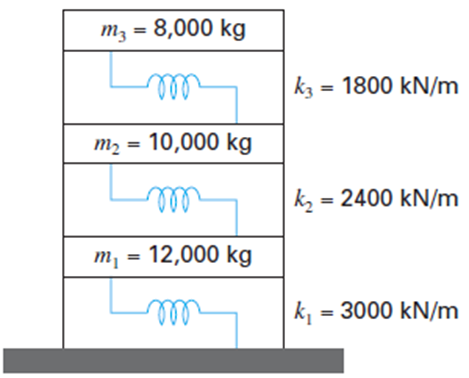

위의 그림과 같이 3층 건물을 질량-스프링 모델로 표현했을 때, 건물의 수평 운동에 대한 운동 방정식은 다음과 같이 뉴턴의 운동법칙을 이용해 연립 미분방정식으로 표현할 수 있다:

$$
\begin{align}
\frac{d^2x_1}{dt^2}&=-\frac{k_1}{m_1}x_1+\frac{k_2}{m_2}\left(x_2-x_1\right)\\
\frac{d^2x_2}{dt^2}&=\frac{k_2}{m_2}\left(x_1-x_2\right)+\frac{k_3}{m_2}\left(x_3-x_2\right)\tag{1}\\
\frac{d^2x_3}{dt^2}&=\frac{k_3}{m_3}\left(x_2-x_3\right)
\end{align}
$$

여기서, $x_1$,$x_2$,$x_3$는 각각 1층, 2층, 3층에 대한 수평방향 변위이다.

이번 실습에서는 **식 (1)**로 표현된 미분방정식을 이용해 $t=0[s]$에서 $t=20[s]$에 대해 시뮬레이션을 해 보겠다. 초기 조건은 땅(또는 1층)의 초기 속도만 $\frac{{dx}_1}{dt}=1[m/s]$이고, 나머지는 모두 $0$이라고 가정한다.

이 문제를 점진적으로 접근하기 위해 우선 한 개의 문제를 풀 수 있는 오일러 방법을 구현해 보고, 이로부터 연립 상미분 방정식을 풀 수 있도록 확장하겠다. 그리고 다시 4차 Runge-Kutta 방법으로 개선하겠다.

## 오일러 방법 구현

우선 한 개의 초기값 상미분 방정식을 풀 수 있는 오일러 방법을 구현해 보겠다.

오일러 방법을 정리해 보면 다음과 같다:

**오일러 방법**

다음과 같은 1계 상미분 방정식에 대해
$$
\frac{dy}{dt}=f\left(t,y\right)
$$
오일러 방법 공식은 다음과 같다.
$$
y\left(t_{i+1}\right)=y\left(t_i\right)+\phi\left(t_i,y_i\right)h\tag{2}
$$
여기서, $\phi\left(t_i,y_i\right)$는 기울기 함수로
$$
\phi\left(t_i,y_i\right)=f\left(t_i,y_i\right)\tag{3}
$$
이고, $h$는 간격 크기(step size)로
$$
h=t_{i+1}-t_i\tag{4}
$$
이다.

**지시: 위의 알고리즘을 참고하여, 오일러 방법을 구현하는 함수 *eulode*를 완성하시오.**

In [ ]:
def eulode(dydt, tspan, y0, h):
  '''
  함수 eulode는 오일러 방법을 구현한다.
  입력 매개변수:
    dydt : 미분방정식에서 주어진 기울기 dy/dt를 나타내는 함수
    tspan : 계산하기 위한 구간 [ti, tf]. 여기서, ti는 시작 시간, tf는 끝나는 시간이다.
    y0 : 시간 ti에서의 y값. 즉, 초기조건
    h : 계산할 때의 시간 간격
  출력 매개변수:
    t : 미분방정식을 계산한 결과로 시간에 대한 벡터
    y : 미분방정식을 계산한 결과로 각 시간에 대한 y값 벡터
  '''

  ti = tspan[0] # 시작 시간
  tf = tspan[1] # 끝 시간
  n = int((tf - ti) / h) + 1 # 반복 횟수
  t = np.linspace(ti, tf, n) # ti에서 tf까지 시간을 n개로 나누어 각 간격의 시간을 계산한다.

  y = np.zeros((n)) # 결과를 0으로 초기화한다.
  y[0] = y0 # 시작값을 y0로 초기화

  # 각 시간 t_i에 대해 t_(i+1)에서의 y값을 계산합니다.
  for i in range(n - 1):
    # 식 (4)를 이용해 간격 크기 h를 다시 계산한다.
    #### 코드 시작 ####
    h = 1
    #### 코드 종료 ####

    # 식 (3)을 이용해 t_i에서의 기울기를 계산한다.
    #### 코드 시작 ####
    slope = 1
    #### 코드 종료 ####

    # 식 (2)의 오일러 방법 공식을 이용해 시간 t_(i+1)에서의 y값을 계산한다.
    #### 코드 시작 ####
    y[i+1] = 1
    #### 코드 종료 ####

  return t, y

코드 작성을 마쳤으면, 코드가 올바르게 작동하는지 테스트를 해 보겠다. 아무 문제가 없다면 아래 코드 실행 시 "**성공**"이라고 출력되어야 한다.

In [ ]:
def test_dydt(t, y):
  return t

t, y = eulode(test_dydt, [0, 10], 0, 1)

assert abs(t[4] - 4) < 0.0001
assert abs(y[4] - 6) < 0.0001

print("성공!!")

## 오일러 방법 구현: 연립 미분 방정식

이번에는 연립 상미분방정식을 풀 수 있도록 *eulode* 함수를 개선해 보겠다. 새로 만드는 함수 이름은 *eulsys*이다.

아래에 있는 *eulsys* 함수의 코드를 이전에 구현한 *eulode* 함수와 동일하게 만든다.

**지시: 오일러 방법을 구현하는 함수 *eulode*를 참고하여 함수 *eulsys*를 수정하시오.**

이제 함수 *eulsys*를 연립방정식에 맞게 수정해 보겠다. 우선 몇 가지 약속을 정해보겠다. 연립방정식이기 때문에 초기값과 기울기는 연립방정식의 개수만큼 필요하다. 우선 초기값 $\mathbf{y}\left(0\right)$은 다음과 같이 열 벡터 형태로 저장된다고 가정한다:

$$
\mathbf{y}\left(0\right)=\left[\begin{matrix}y_1\left(0\right)\\\vdots\\y_n\left(0\right)\\\end{matrix}\right]
$$

마찬가지로, 기울기 $\frac{d\mathbf{y}}{dt}$도 다음과 같이 열 벡터 형태로 저장된다고 가정한다:

$$
\frac{d\mathbf{y}}{dt}=\left[\begin{matrix}\frac{dy_1}{dt}\\\frac{dy_2}{dt}\\\end{matrix}\right]
$$

반면에, 결과값 $\mathbf{y}$는 다음과 같은 형태로 저장된다고 가정한다. 여기서 $\mathbf{y}$의 1행은 시간 $t=0$, 2행은 시간 $t=h$, 3행은 시간 $t=2h$, …를 나타낸다:

$$
\mathbf{y}=\left[\begin{matrix}y_1\left(0\right)&\cdots&y_n\left(0\right)\\y_1\left(h\right)&\cdots&y_n\left(h\right)\\\vdots&\vdots&\vdots\\\end{matrix}\right]
$$

이제, 함수 *eulsys*를 수정해 보겠다. 첫 번째로, 초기값을 설정하는 부분을 기존

```python
y = np.zeros((n))
y[0] = y0
```
에서
```python
y = np.zeros((n, len(y0)))
y[0,:] = y0
```
로 수정한다.

위 코드의 의미는, y의 0행의 모든 열에 y0 값을 대입한다는 의미이다. y의 0행은 처음 시간을 의미한다.

**지시: 위의 내용을 참고하여 함수 *eulsys*를 수정하시오.**

 두 번째로, 기울기를 계산하는 부분을 행렬식에 맞게 수정한다. 기존 코드에서 기울기 slope를 계산하는 부분을 다음과 같이 수정한다.

 ```python
 slope = dydt(t[i], y[i,:])
 ```

 위의 코드를 보면, y값이 들어가는 부분이 y[i, :]로 치환되었다. y[i, :]는 시간 $t_i$에서의 $\left[y_1\ y_2\ \ldots\right]$값을 의미한다.

 **지시: 위의 내용을 참고하여 함수 *eulsys*를 수정하시오.**

마지막으로, 오일러 방법 공식을 행렬식에 맞게 수정한다. 기존 코드에서 y[i+1]을 계산하는 부분을 다음과 같이 수정한다.

```python
y[i+1,:] = y[i,:] + slope * h
```

**지시: 위의 내용을 참고하여 함수 *eulsys*를 수정하시오.**

In [ ]:
def eulsys(dydt, tspan, y0, h):
  # 위의 지시들에 따라서 코드를 완성하시오
  #### 코드 시작 ####
  t = 0
  y = 0
  #### 코드 종료 ####

  return t, y

이제 수정한 코드를 테스트해 보겠다. 아무 문제가 없다면 아래 코드 실행 시 "**성공**"이라고 출력되어야 한다.

In [ ]:
def test_dydt(t, y):
  dy = np.zeros((2))
  dy[0] = y[1]
  dy[1] = 9.81 - 0.25 / 68.1 * y[1]**2
  return dy

t, y = eulsys(test_dydt, [0, 10], [0, 0], 2)

assert abs(t[2] - 4) < 0.0001
assert abs(y[2, 0] - 39.24) < 0.0001
assert abs(y[2, 1] - 36.41368282) < 0.0001

print("성공!!")

## 4차 Runge-Kutta 방법 구현

앞에서 구현한 오일러 방법은 오차가 너무 크기 때문에 정확도가 떨어진다. 이번에는 정확도가 높은 4차 RK 방법을 구현해 적용해 보겠다.

아래에 있는 *rk4sys* 함수의 코드를 이전에 구현한 *eulsys*와 동일하게 만든다.

**지시: 함수 *eulsys*를 참고하여 함수 *rk4sys*를 수정하시오.**

이번에 구현할 4차 Runge-Kutta 방법을 정리해 보면 다음과 같다.

**4차 Runge-Kutta 방법**

다음과 같은 1계 상미분 방정식에 대해
$$
\frac{dy}{dt}=f\left(t,y\right)
$$
4차 Runge-Kutta법 공식은 다음과 같다.
$$
y\left(t_{i+1}\right)=y\left(t_i\right)+\phi\left(t_i,y_i\right)h
$$
여기서, $\phi\left(t_i,y_i\right)$는 기울기 함수로
$$
\phi\left(t_i,y_i\right)=\frac{1}{6}\left(k_1+2k_2+2k_3+k_4\right)
$$
이고,
$$
\begin{align}
k_1&=f\left(t_i,y_i\right)\\
k_2&=f\left(t_i+\frac{1}{2}h,y_i+\frac{1}{2}k_1h\right)\\
k_3&=f\left(t_i+\frac{1}{2}h,y_i+\frac{1}{2}k_2h\right)\\
k_4&=f\left(t_i+h,y_i+k_3h\right)
\end{align}
$$
이다. 또한, $h$는 간격 크기(step size)로
$$
h=t_{i+1}-t_i
$$
이다.


위에 주어진 식은 한 개의 상미분 방정식에 대한 것이지만, 오일러 방법과 같이 연립 상미분방정식에 대해 쉽게 확장할 수 있다. 오일러 방법을 참고해서 4차 Runge-Kutta 방법으로 수정하시오. 참고로 for 내부만 수정하면 된다.

In [ ]:
def rk4sys(dydt, tspan, y0, h):
  # 위의 지시들에 따라서 코드를 완성하시오
  #### 코드 시작 ####
  t = 0
  y = 0
  #### 코드 종료 ####

  return t, y

이제 수정한 코드를 테스트해 보겠다. 아무 문제가 없다면 아래 코드 실행 시 "**성공**"이라고 출력되어야 한다.

In [ ]:
def test_dydt(t, y):
  dy = np.zeros((2))
  dy[0] = y[1]
  dy[1] = 9.81 - 0.25 / 68.1 * y[1]**2
  return dy

t, y = rk4sys(test_dydt, [0, 10], [0, 0], 2)

assert abs(t[2] - 4) < 0.0001
assert abs(y[2, 0] - 71.93111621) < 0.0001
assert abs(y[2, 1] - 33.09947365) < 0.0001

print("성공!!")

## 지진 시뮬레이션

4차 Runge-Kutta법을 구현했으므로, 실제 문제를 풀어보겠다.

**식 (1)**은 2계 상미분 방정식이므로 이를 1계 상미분 방정식으로 변환해야 한다. 앞의 문제에서 다음과 같이 변수를 정의하면
$$
x_4=\frac{dx_1}{dt},\ x_5=\frac{dx_2}{dt},\ x_6=\frac{dx_3}{dt}
$$
원래의 **식 (1)**은 다음과 같이 변환된다:
$$
\begin{align}
\frac{dx_1}{dt}&=x_4\\
\frac{dx_2}{dt}&=x_5\\
\frac{dx_3}{dt}&=x_6\\
\frac{dx_4}{dt}&=-\frac{k_1}{m_1}x_1+\frac{k_2}{m_2}\left(x_2-x_1\right)\tag{5}\\
\frac{dx_5}{dt}&=\frac{k_2}{m_2}\left(x_1-x_2\right)+\frac{k_3}{m_2}\left(x_3-x_2\right)\\
\frac{dx_6}{dt}&=\frac{k_3}{m_3}\left(x_2-x_3\right)
\end{align}
$$

**식 (5)**를 함수로 구현한다.

**지시: 위의 내용을 참고하여 함수 *dxdtquake*를 완성하시오.**

In [ ]:
def dxdtquake(t, x):
  m1=12000
  m2=10000
  m3=8000
  k1=3000
  k2=2400
  k3=1800

  dy = np.zeros((6))

  dy[0] = x[3]
  dy[1] = x[4]
  dy[2] = x[5]
  # 식 (5)를 참고하여 dy[3]~dy[5]를 완성하시오
  #### 코드 시작 ####
  dy[3] = 0
  dy[4] = 0
  dy[5] = 0
  #### 코드 종료 ####
  return dy

아무 문제가 없다면 아래 코드 실행 시 "**성공**"이라고 출력되어야 한다.

In [ ]:
test_dy = dxdtquake(0, [1, 2, 3, 4, 5, 6])

assert abs(test_dy[0] - 4) < 0.0001
assert abs(test_dy[1] - 5) < 0.0001
assert abs(test_dy[2] - 6) < 0.0001
assert abs(test_dy[3] + 0.01) < 0.0001
assert abs(test_dy[4] + 0.06) < 0.0001
assert abs(test_dy[5] + 0.225) < 0.0001

print("성공!!")

앞에서 구현한 함수 *rk4sys*를 이용해 결과를 계산한다.

In [ ]:
tspan = [0, 20]
y0 = [0, 0, 0, 1, 0, 0]
h = 0.1

t, x = rk4sys(dxdtquake, tspan, y0, h)

계산 결과를 그래프로 그려본다.

In [ ]:
_, axes = plt.subplots(2, constrained_layout=True)

ax = axes[0]
ax.plot(t, x[:, 0])
ax.plot(t, x[:, 1], ':')
ax.plot(t, x[:, 2], '--')

ax.legend(['x1', 'x2', 'x3'])
ax.set_title('Displacements (m)')
ax.set_xlabel('time (s)')
ax.set_ylabel('displacement (m)')

ax = axes[1]
ax.plot(t, x[:, 3])
ax.plot(t, x[:, 4], ':')
ax.plot(t, x[:, 5], '--')

ax.legend(['dx1/dt', 'dx2/dt', 'dx3/dt'])
ax.set_title('Velocities (m/s)')
ax.set_xlabel('time (s)')
ax.set_ylabel('velocity (m/s)')

수고하셨습니다.